Группа: ДПИ23-1<br>
Студент: Тарасов С.В.

## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [2]:
from pandas_datareader import data as web
import datetime
import yfinance as yf 

In [3]:
aapl = yf.download('AAPL','2017-01-01','2018-12-31')
aapl

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,26.952715,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,26.922537,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.059450,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.361118,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.611734,134247600
...,...,...,...,...,...,...
2018-12-21,39.215000,39.540001,37.407501,37.682499,36.073048,382978400
2018-12-24,37.037498,37.887501,36.647499,36.707500,35.139690,148676800
2018-12-26,37.075001,39.307499,36.680000,39.292500,37.614292,234330000


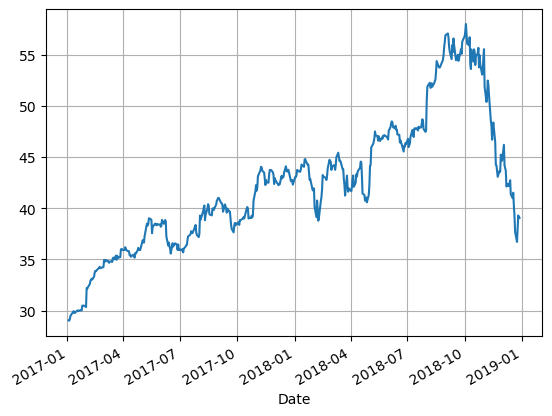

In [4]:
aapl['Close'].plot(grid=True)

plt.show()

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

<Axes: >

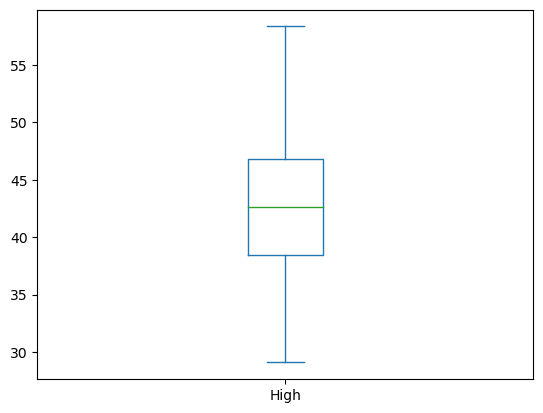

In [5]:
aapl['High'].plot.box()

<Axes: ylabel='Frequency'>

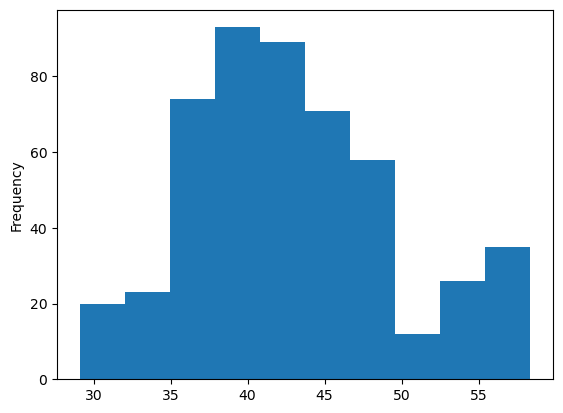

In [6]:
aapl['High'].plot(kind='hist')

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [7]:
average_ratings = np.load('average_ratings.npy')
pd.DataFrame(average_ratings)

,0,1,2,3,4,5,6,7,8,9,...,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094
0,5.0,5.013103,5.026240,5.013103,5.000000,4.986932,5.000000,5.013103,5.000000,4.986932,...,5.451021,5.436773,5.451021,5.465305,5.479627,5.493987,5.508384,5.522819,5.537292,5.522819
1,7.0,6.970750,7.000000,6.970750,6.941621,6.970750,7.000000,6.970750,7.000000,7.029373,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
2,3.0,2.996861,2.993725,2.996861,3.000000,2.996861,2.993725,2.996861,2.993725,2.996861,...,2.984338,2.981216,2.984338,2.981216,2.984338,2.987464,2.990593,2.993725,2.990593,2.987464


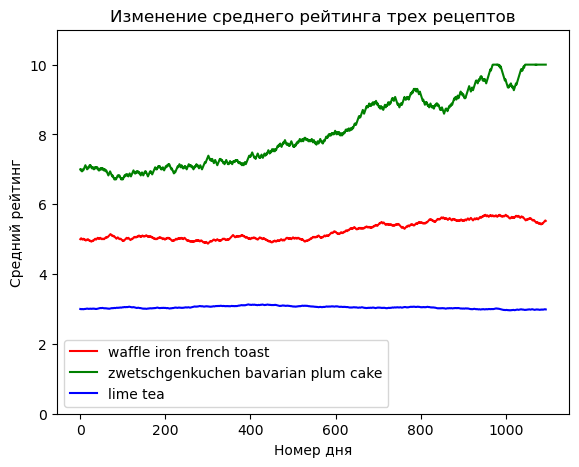

In [8]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

line1, = ax.plot(average_ratings[0], 'r', label = 'waffle iron french toast')
line2, = ax.plot(average_ratings[1], 'g', label = 'zwetschgenkuchen bavarian plum cake')
line3, = ax.plot(average_ratings[2], 'b', label = 'lime tea')

ax.set_xlabel('Номер дня')
ax.set_ylabel('Средний рейтинг')

ax.set_ylim([0, 11])
ax.set_title('Изменение среднего рейтинга трех рецептов')

ax.legend(handles=[line1, line2, line3])

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


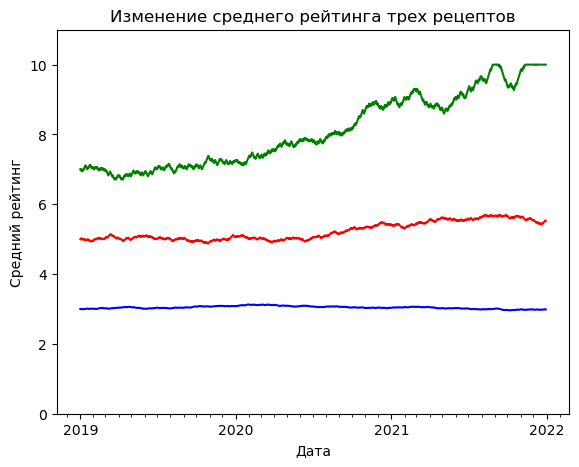

In [9]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

date = pd.date_range(start = '2019/1/1', end = '2021/12/30', freq = 'D')

line1, = ax.plot(date, average_ratings[0], 'r', label = 'waffle iron french toast')
line2, = ax.plot(date, average_ratings[1], 'g', label = 'zwetschgenkuchen bavarian plum cake')
line3, = ax.plot(date, average_ratings[2], 'b', label = 'lime tea')

ax.set_xlabel('Дата')
ax.set_ylabel('Средний рейтинг')

ax.set_ylim([0, 11])
ax.set_title('Изменение среднего рейтинга трех рецептов')

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

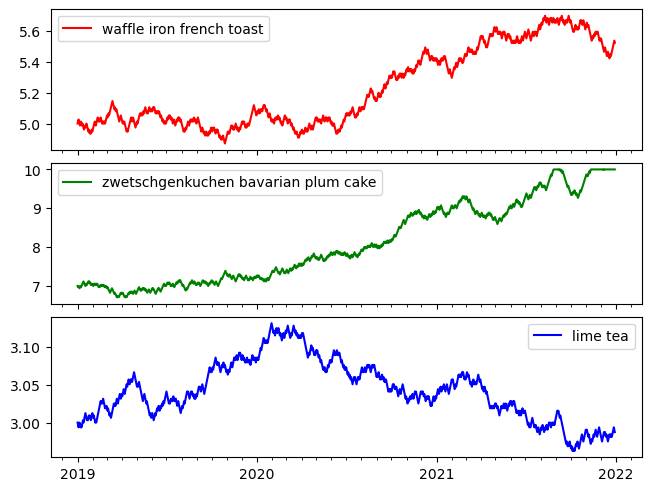

In [10]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, layout = 'constrained', sharex = True)

axes[0].plot(date, average_ratings[0], 'r', label = 'waffle iron french toast')
axes[1].plot(date, average_ratings[1], 'g', label = 'zwetschgenkuchen bavarian plum cake')
axes[2].plot(date, average_ratings[2], 'b', label = 'lime tea')

for axi in axes:
    axi.xaxis.set_major_locator(mdates.YearLocator())
    axi.xaxis.set_minor_locator(mdates.MonthLocator())
    axi.legend()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


In [11]:
visitors = np.load('visitors.npy')
visitors

array([2311, 2023, 1839, 1523, 1371, 1217, 1098,  958,  862,  724,  654,
        558,  526,  454,  383,  372,  356,  274,  239,  236,  214,  179,
        180,  140,  138,  112,  102,  101,   74,   81,   70,   74,   53,
         57,   52,   44,   38,   30,   37,   27,   20,   21,   16,   16,
         12,    9,   13,   10,   13,    7,    5,    8,    6,    8,    9,
          4,    3,    4,    4,    2,    2,    3,    2,    2,    2,    2,
          2,    3,    2,    2,    3,    2,    2,    2,    2,    3,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2], dtype=int32)

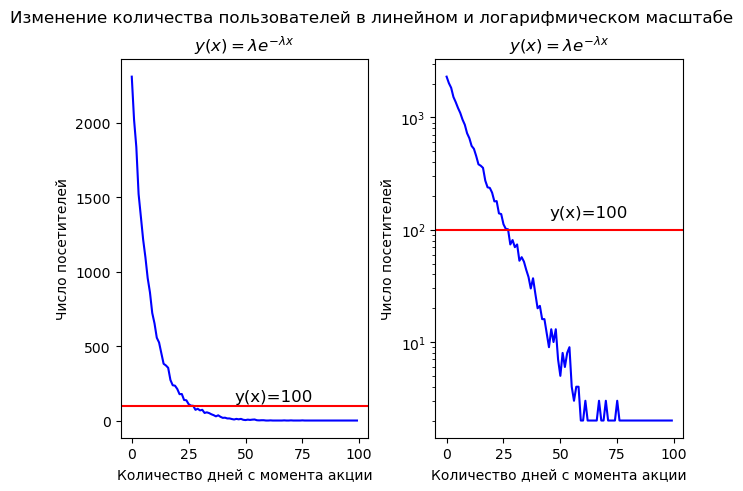

In [12]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, layout = 'constrained')

axes[0].plot(visitors, 'b')
axes[1].plot(visitors, 'b')
axes[1].set_yscale('log')
fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')

for ax in axes:
    ax.set_title('$y(x)=\lambda e^{-\lambda x}$')
    ax.axhline(y = 100, color = 'r')
    ax.set_xlabel("Количество дней с момента акции")
    ax.set_ylabel("Число посетителей")
    ax.text(45., 130., 'y(x)=100', fontsize = 12)

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [13]:
recipes = pd.read_csv('recipes_sample.csv', delimiter=',')
reviews = pd.read_csv('reviews_sample.csv', delimiter=',', index_col = 0)

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [14]:
short = recipes.loc[recipes.minutes < 5]
short.insert(8, 'duration', 'Короткий')
medium = recipes.loc[(recipes.minutes < 50)&(recipes.minutes >= 5)]
medium.insert(8, 'duration', 'Средний')
long = recipes.loc[recipes.minutes >= 50]
long.insert(8, 'duration', 'Длинный')

recipes = pd.concat([long, short, medium])

In [15]:
group = recipes.groupby('duration').aggregate({'id': 'count', 'n_steps': 'mean'})
group

,id,n_steps
duration,,
Длинный,11718,11.917290
Короткий,675,4.990431
Средний,17607,8.581922


<Axes: title={'center': 'Размеры групп рецептов'}>

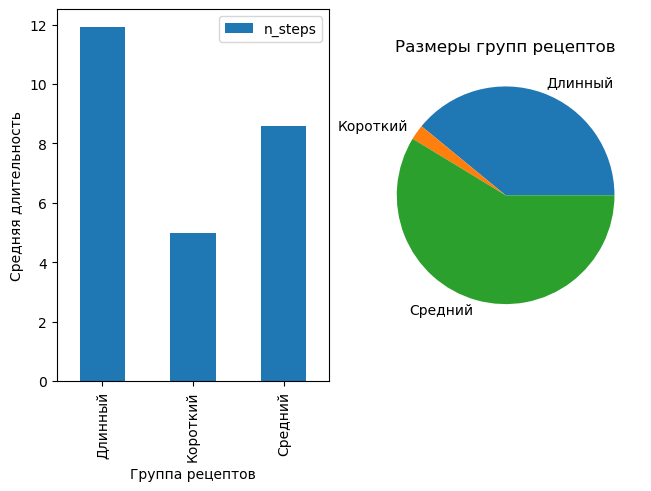

In [16]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, layout = 'constrained')
group.plot(y = 'n_steps', ax = axes[0], kind = 'bar', xlabel = "Группа рецептов", ylabel = "Средняя длительность")
group.plot(y = 'id', ax = axes[1], kind = 'pie', title = "Размеры групп рецептов", ylabel = '', legend = False)

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

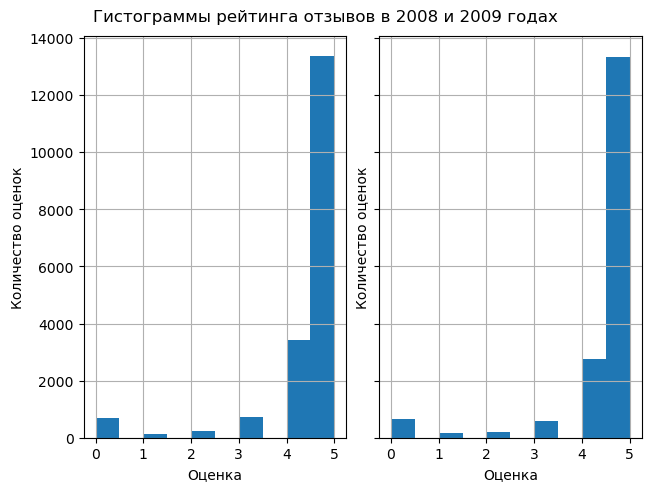

In [17]:
reviews.date = pd.to_datetime(reviews.date)

fig, axes = plt.subplots(1, 2, layout = "constrained", sharey = True)
fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')

reviews.loc[reviews.date.dt.year == 2008].rating.hist(ax = axes[0])
reviews.loc[reviews.date.dt.year == 2009].rating.hist(ax = axes[1])

for ax in axes:
    ax.set_xlabel('Оценка')
    ax.set_ylabel('Количество оценок')

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

Text(0.5, 1.0, 'Диаграмма рассеяния n_steps и n_ingredients')

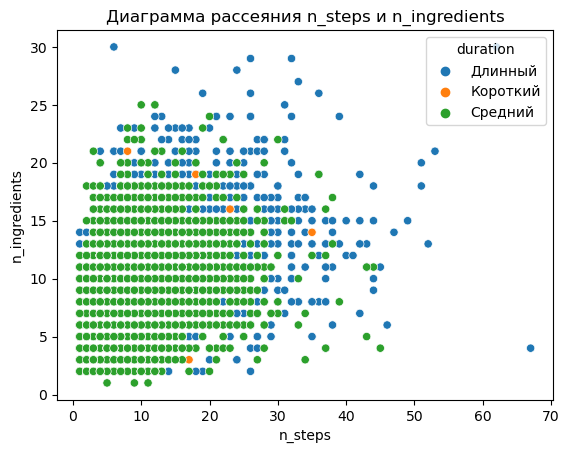

In [18]:
sns.scatterplot(recipes,
                x = 'n_steps',
                y = 'n_ingredients',
                hue = 'duration').set_title('Диаграмма рассеяния n_steps и n_ingredients')

Линейной зависимости не наблюдается

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

In [19]:
recipes_and_reviews = recipes.merge(reviews, left_on = 'id', right_on = 'user_id')
recipes_and_reviews = recipes_and_reviews[['minutes', 'n_steps', 'n_ingredients', 'rating']]

Text(0.5, 1.0, 'Корреляционная матрица числовых столбцов таблиц recipes и reviews')

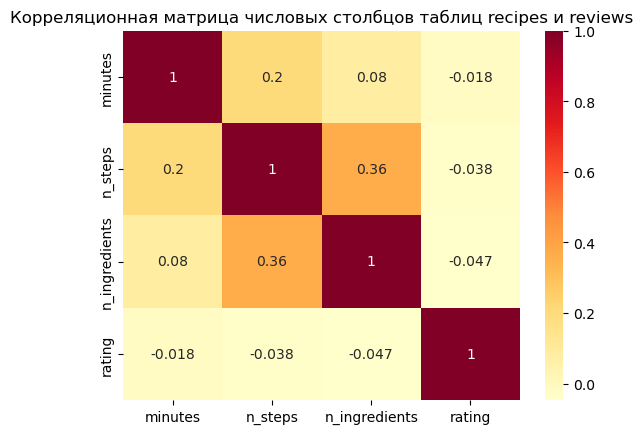

In [20]:
sns.heatmap(recipes_and_reviews.corr(),
            annot = True,
            cmap = 'YlOrRd').set_title("Корреляционная матрица числовых столбцов таблиц recipes и reviews")